In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from helpers import *

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)

In [2]:
train = pd.read_parquet("/Users/furkan/development/ML_DS/İş Bankası/train_final.parquet")
test = pd.read_parquet("/Users/furkan/development/ML_DS/İş Bankası/test_final.parquet")
df = train.copy()
df.head()

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,5beefd4d2bf4a4767e0df8108,10,5245.571,981.182,205.948,VODAFONE TR,Apple,-1.198,1.113,-1.123,-0.264,2.161,2.651,0.810,1.516,2.351,-4.608,0.678,-0.555,3.502,-0.765,1.543,-1.458,-1.017,-1.820,0.726,-1.444,1.087,2.102,-0.249,-0.583,-1.330,1.407,1.054,-1.532,1.667,0.251,-0.091,2.676,-0.621,0.163,1.720,-6.139,-0.303,2.784,-3.135,-3.794,0.930,-2.613,-2.033,2.646,-1.023,1.659,-1.559,-2.161,30,58,"menu2, menu4, menu5"
1,867285b116c063d5a8482f5be,10,5184.876,557.650,487.587,TURKCELL,samsung,-2.336,2.568,-0.495,0.949,3.568,3.358,0.434,0.886,1.452,-3.184,1.024,1.166,2.916,-1.281,3.019,-3.163,-1.120,-2.798,0.287,-2.029,0.260,0.962,-0.534,-1.311,-0.144,-1.562,1.931,-0.942,-0.000,-1.372,1.225,2.795,-0.961,0.114,1.048,-5.697,0.902,-0.073,-2.366,-0.600,0.815,-0.984,-1.454,-0.022,-0.196,2.776,-0.319,-4.291,21,45,"menu7, menu8, menu4"
2,c82a7cbd2e00d9b66c06bcadc,10,3835.618,3275.128,43.806,TURK TELEKOM,Redmi,-2.561,2.062,-0.185,1.062,4.198,1.551,-0.596,-0.619,2.017,-4.631,-0.663,-0.838,1.821,-2.171,3.695,-0.922,-2.873,-2.042,0.533,-0.128,0.450,2.716,-0.178,0.052,-0.518,-0.043,1.157,-0.527,-0.088,-0.497,1.203,2.742,-0.623,1.757,2.059,-5.359,0.929,1.133,-3.100,-1.253,1.057,-1.669,-3.599,1.674,0.632,1.293,-2.231,-2.384,19,61,"menu2, menu8, menu4"
3,f2d2b25073ccc298eced86897,10,3532.544,154.509,64.724,TURKCELL,samsung,-2.530,3.358,-0.851,1.644,2.849,3.887,1.855,0.988,2.066,-5.804,1.931,0.151,3.145,-2.673,0.378,-2.657,-0.378,-3.276,0.003,-0.674,-0.227,1.817,0.068,-0.787,-1.708,-2.000,1.770,0.049,0.230,-0.304,1.659,1.692,-1.105,1.242,2.043,-3.854,0.649,0.944,-3.027,-1.824,0.204,-1.861,-1.220,1.863,0.213,1.030,-1.142,-4.466,2,41,"menu6, menu2, menu1"
4,7818c92a58af0f2cb7c361738,10,3344.192,787.896,715.115,VODAFONE TR,samsung,-2.922,2.096,0.061,-1.488,3.225,2.092,-0.993,0.686,2.090,-2.974,-0.797,-1.459,2.398,-1.308,3.381,-2.664,-2.219,-1.714,1.288,-2.250,2.345,0.403,-0.077,0.289,1.847,1.424,1.888,-1.022,1.021,-0.843,-0.859,2.565,0.412,0.068,0.391,-5.996,2.675,0.203,-3.272,-1.418,2.188,-0.143,-1.876,1.024,-0.186,-0.062,-1.462,-2.371,23,85,"menu6, menu2, menu8"


## EDA

In [3]:
check_df(df)

##################### Shape #####################
(94049, 58)
##################### Types #####################
id              object
month            int64
n_seconds_1    float64
n_seconds_2    float64
n_seconds_3    float64
carrier         object
devicebrand     object
feature_0      float64
feature_1      float64
feature_2      float64
feature_3      float64
feature_4      float64
feature_5      float64
feature_6      float64
feature_7      float64
feature_8      float64
feature_9      float64
feature_10     float64
feature_11     float64
feature_12     float64
feature_13     float64
feature_14     float64
feature_15     float64
feature_16     float64
feature_17     float64
feature_18     float64
feature_19     float64
feature_20     float64
feature_21     float64
feature_22     float64
feature_23     float64
feature_24     float64
feature_25     float64
feature_26     float64
feature_27     float64
feature_28     float64
feature_29     float64
feature_30     float64
feature_31    

In [4]:
df.duplicated().sum()

0

In [5]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 94049
Variables: 58
cat_cols: 1
num_cols: 53
cat_but_car: 4
num_but_cat: 1


       month  Ratio
month              
12     44433 47.245
11     34485 36.667
10     15131 16.088
##########################################


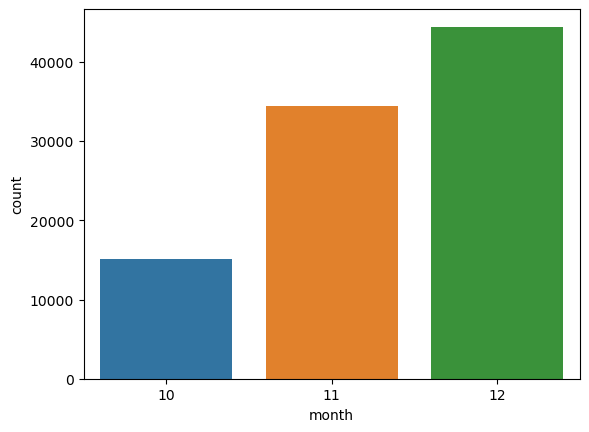

In [6]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

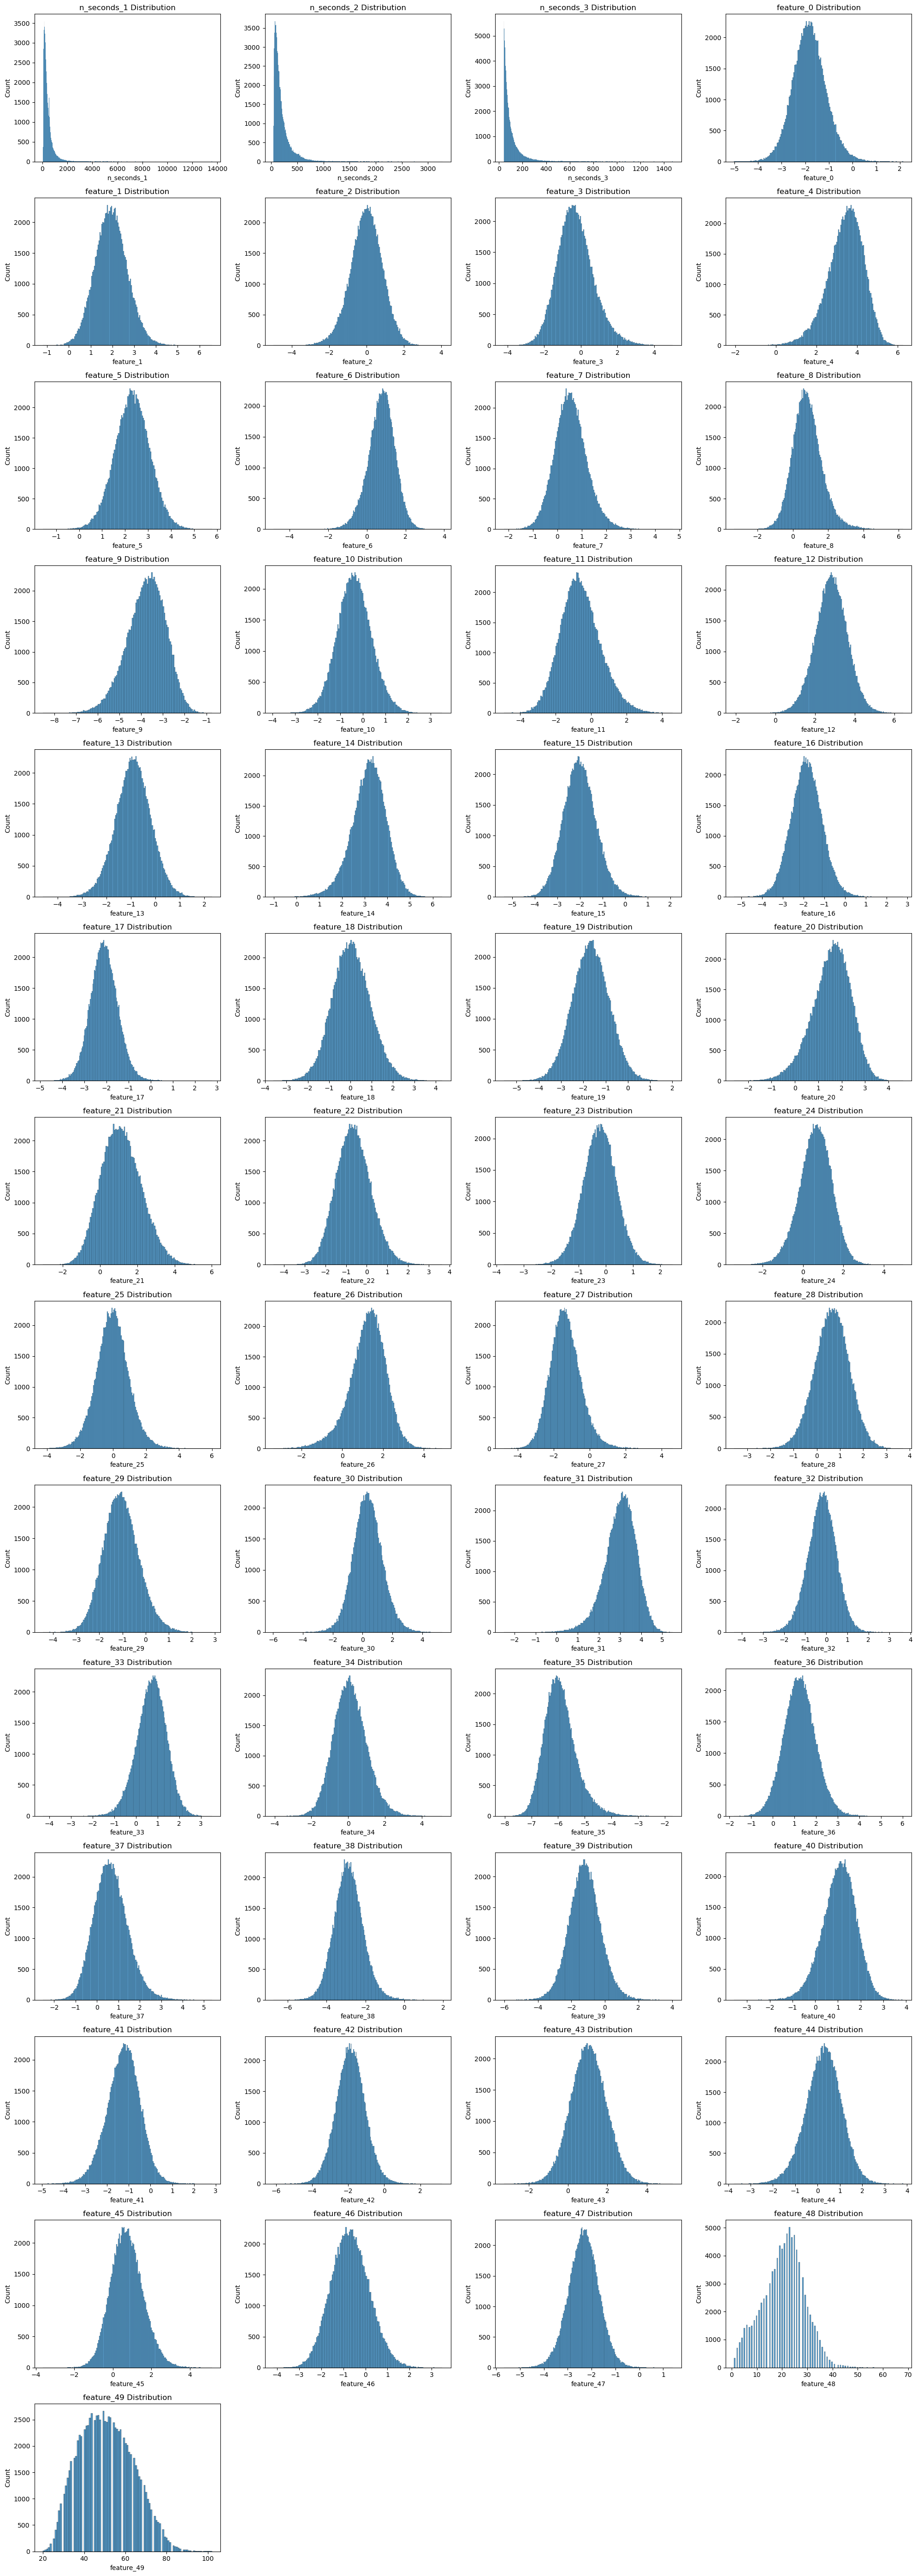

In [7]:
n_rows = len(num_cols) // 4 + (1 if len(num_cols) % 4 > 0 else 0)
n_cols = 4
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, n_cols * n_rows))

for i, column in enumerate(num_cols):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(df[column], kde=False, ax=axs[row, col])
    axs[row, col].set_title(f"{column} Distribution")

for i in range(len(num_cols), n_rows * n_cols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()

In [8]:
carrier_list = df["carrier"].value_counts()[df["carrier"].value_counts() > 3000].index
carrier_list

Index(['TURKCELL', 'VODAFONE TR', 'TURK TELEKOM'], dtype='object', name='carrier')

In [9]:
df["devicebrand"].value_counts()

devicebrand
Apple            33238
samsung          31971
Redmi             7709
HUAWEI            6595
xiaomi            5300
OPPO              3247
POCO               989
GM                 770
realme             562
lge                442
TECNO              296
Casper             278
HONOR              264
Vestel             261
vivo               239
reeder             220
Sony               216
OnePlus            185
Lenovo             181
gm                 178
asus               156
TCL                151
OMIX               114
Infinix             65
Nokia               57
google              53
Meizu               49
motorola            31
htc                 21
Alcatel             21
ZTE                 18
Realme              16
TURKCELL            14
OUKITEL             14
HIKING              13
CASPER              13
Reeder              12
generalmobile       11
HTC                  7
meizu                7
Trident              6
HiKING               5
Turk_Telekom         5

In [10]:
device_list = df["devicebrand"].value_counts()[df["devicebrand"].value_counts() > 3000].index
device_list

Index(['Apple', 'samsung', 'Redmi', 'HUAWEI', 'xiaomi', 'OPPO'], dtype='object', name='devicebrand')

In [11]:
df["devicebrand"].value_counts()[df["devicebrand"].value_counts() < 3000].sum()

5989

In [12]:
def categorize_carrier(x):
    if x == "VODAFONE TR":
        return "VODAFONE TR"
    elif x == "TURKCELL":
        return "TURKCELL"
    elif x == "TURK TELEKOM":
        return "TURK TELEKOM"
    else:
        return "others"
    
df["carrier"] = df["carrier"].apply(categorize_carrier)

In [13]:
df.head()

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,5beefd4d2bf4a4767e0df8108,10,5245.571,981.182,205.948,VODAFONE TR,Apple,-1.198,1.113,-1.123,-0.264,2.161,2.651,0.810,1.516,2.351,-4.608,0.678,-0.555,3.502,-0.765,1.543,-1.458,-1.017,-1.820,0.726,-1.444,1.087,2.102,-0.249,-0.583,-1.330,1.407,1.054,-1.532,1.667,0.251,-0.091,2.676,-0.621,0.163,1.720,-6.139,-0.303,2.784,-3.135,-3.794,0.930,-2.613,-2.033,2.646,-1.023,1.659,-1.559,-2.161,30,58,"menu2, menu4, menu5"
1,867285b116c063d5a8482f5be,10,5184.876,557.650,487.587,TURKCELL,samsung,-2.336,2.568,-0.495,0.949,3.568,3.358,0.434,0.886,1.452,-3.184,1.024,1.166,2.916,-1.281,3.019,-3.163,-1.120,-2.798,0.287,-2.029,0.260,0.962,-0.534,-1.311,-0.144,-1.562,1.931,-0.942,-0.000,-1.372,1.225,2.795,-0.961,0.114,1.048,-5.697,0.902,-0.073,-2.366,-0.600,0.815,-0.984,-1.454,-0.022,-0.196,2.776,-0.319,-4.291,21,45,"menu7, menu8, menu4"
2,c82a7cbd2e00d9b66c06bcadc,10,3835.618,3275.128,43.806,TURK TELEKOM,Redmi,-2.561,2.062,-0.185,1.062,4.198,1.551,-0.596,-0.619,2.017,-4.631,-0.663,-0.838,1.821,-2.171,3.695,-0.922,-2.873,-2.042,0.533,-0.128,0.450,2.716,-0.178,0.052,-0.518,-0.043,1.157,-0.527,-0.088,-0.497,1.203,2.742,-0.623,1.757,2.059,-5.359,0.929,1.133,-3.100,-1.253,1.057,-1.669,-3.599,1.674,0.632,1.293,-2.231,-2.384,19,61,"menu2, menu8, menu4"
3,f2d2b25073ccc298eced86897,10,3532.544,154.509,64.724,TURKCELL,samsung,-2.530,3.358,-0.851,1.644,2.849,3.887,1.855,0.988,2.066,-5.804,1.931,0.151,3.145,-2.673,0.378,-2.657,-0.378,-3.276,0.003,-0.674,-0.227,1.817,0.068,-0.787,-1.708,-2.000,1.770,0.049,0.230,-0.304,1.659,1.692,-1.105,1.242,2.043,-3.854,0.649,0.944,-3.027,-1.824,0.204,-1.861,-1.220,1.863,0.213,1.030,-1.142,-4.466,2,41,"menu6, menu2, menu1"
4,7818c92a58af0f2cb7c361738,10,3344.192,787.896,715.115,VODAFONE TR,samsung,-2.922,2.096,0.061,-1.488,3.225,2.092,-0.993,0.686,2.090,-2.974,-0.797,-1.459,2.398,-1.308,3.381,-2.664,-2.219,-1.714,1.288,-2.250,2.345,0.403,-0.077,0.289,1.847,1.424,1.888,-1.022,1.021,-0.843,-0.859,2.565,0.412,0.068,0.391,-5.996,2.675,0.203,-3.272,-1.418,2.188,-0.143,-1.876,1.024,-0.186,-0.062,-1.462,-2.371,23,85,"menu6, menu2, menu8"


In [14]:
df.carrier.value_counts()

carrier
TURKCELL        39043
VODAFONE TR     25583
TURK TELEKOM    22091
others           7332
Name: count, dtype: int64

In [15]:
def categorize_device_brand(x):
    if x == "Apple":
        return "Apple"
    elif x == "samsung":
        return "samsung"
    elif x == "xiaomi":
        return "xiaomi"
    elif x == "HUAWEI":
        return "HUAWEI"
    elif x == "OPPO":
        return "OPPO"
    elif x == "Redmi":
        return "Redmi"
    else:
        return "others"
    
df["devicebrand"] = df["devicebrand"].apply(categorize_device_brand)

In [16]:
df["devicebrand"].value_counts()

devicebrand
Apple      33238
samsung    31971
Redmi       7709
HUAWEI      6595
others      5989
xiaomi      5300
OPPO        3247
Name: count, dtype: int64

In [17]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 94049
Variables: 58
cat_cols: 3
num_cols: 53
cat_but_car: 2
num_but_cat: 1


In [18]:
df.sample(5)

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
21740,22f6ead170d48da260dc05130,11,606.586,374.823,43.736,VODAFONE TR,samsung,-1.720,2.204,-0.170,0.885,4.065,1.733,1.427,1.511,1.054,-4.319,-0.144,-0.665,2.315,-1.256,2.690,-1.822,-1.917,-2.318,-0.284,-0.514,0.228,2.078,-0.671,-0.131,0.239,-1.308,0.714,0.185,1.094,-2.019,0.759,4.205,0.156,0.260,0.248,-6.333,1.018,-0.099,-2.966,-1.027,0.354,-0.586,-2.429,-0.488,1.461,1.057,-1.477,-2.370,16,34,"menu9, menu2, menu5"
45890,0f5b0648de1600bb7e33acb02,11,123.116,87.329,52.464,VODAFONE TR,Apple,-2.760,3.346,0.662,0.166,2.939,3.467,1.318,1.258,1.350,-4.246,0.165,-0.791,2.263,-0.339,2.733,-2.795,-1.904,-2.318,0.097,-1.276,1.534,1.568,-0.943,-0.006,0.614,-0.817,1.545,-1.046,0.328,-0.514,0.908,2.660,-0.889,0.004,0.616,-6.616,0.224,0.881,-2.605,-1.984,1.519,-1.652,-1.704,1.470,0.407,0.800,-0.726,-3.517,9,48,"menu6, menu2, menu4"
9111,cd70dafab3100e1b00b2477b4,10,215.024,91.146,44.402,TURK TELEKOM,Apple,-1.161,1.042,0.035,-1.923,4.466,1.421,1.465,0.257,0.402,-1.823,-0.562,-1.803,2.492,-0.490,3.074,-1.996,-1.052,-1.254,-0.690,-3.173,3.191,-0.718,-1.442,0.250,0.737,-0.095,1.962,-2.494,0.386,-1.038,-0.220,2.149,-0.072,1.824,-0.326,-6.517,1.416,0.563,-1.949,-0.894,2.564,-0.895,-0.423,-0.358,2.492,0.228,-1.244,-2.382,29,60,"menu6, menu2, menu4"
35622,646d606adb5c4caca71dd396c,11,254.497,113.657,89.173,TURKCELL,samsung,-1.679,1.295,-0.115,0.405,3.501,3.629,0.900,-0.777,1.466,-2.833,0.506,-0.770,1.761,-1.986,3.206,-2.111,-1.757,-1.806,-0.701,0.197,1.655,-0.370,0.548,0.140,0.329,0.301,1.228,-2.429,0.442,0.097,0.479,3.008,0.107,1.022,0.260,-6.408,1.156,1.391,-3.701,-3.280,2.427,-1.576,-2.068,2.115,-1.244,-0.118,-0.459,-1.711,19,48,"menu6, menu2, menu4"
60497,dfe117b53e621172d3c5f9c03,12,572.460,286.969,156.280,VODAFONE TR,samsung,-2.106,2.193,-0.798,-0.689,2.757,2.677,0.349,-0.805,1.644,-3.774,-1.096,0.532,3.017,-0.511,4.020,-1.541,-2.671,-1.691,-1.728,-1.543,1.370,0.647,-1.394,0.978,0.831,-0.873,1.166,-1.341,2.208,-0.712,2.518,1.850,0.402,0.922,0.798,-6.872,0.655,-0.128,-1.415,-0.399,1.172,-1.906,-0.295,1.129,-0.379,-0.374,-1.027,-2.289,23,54,"menu6, menu2, menu4"


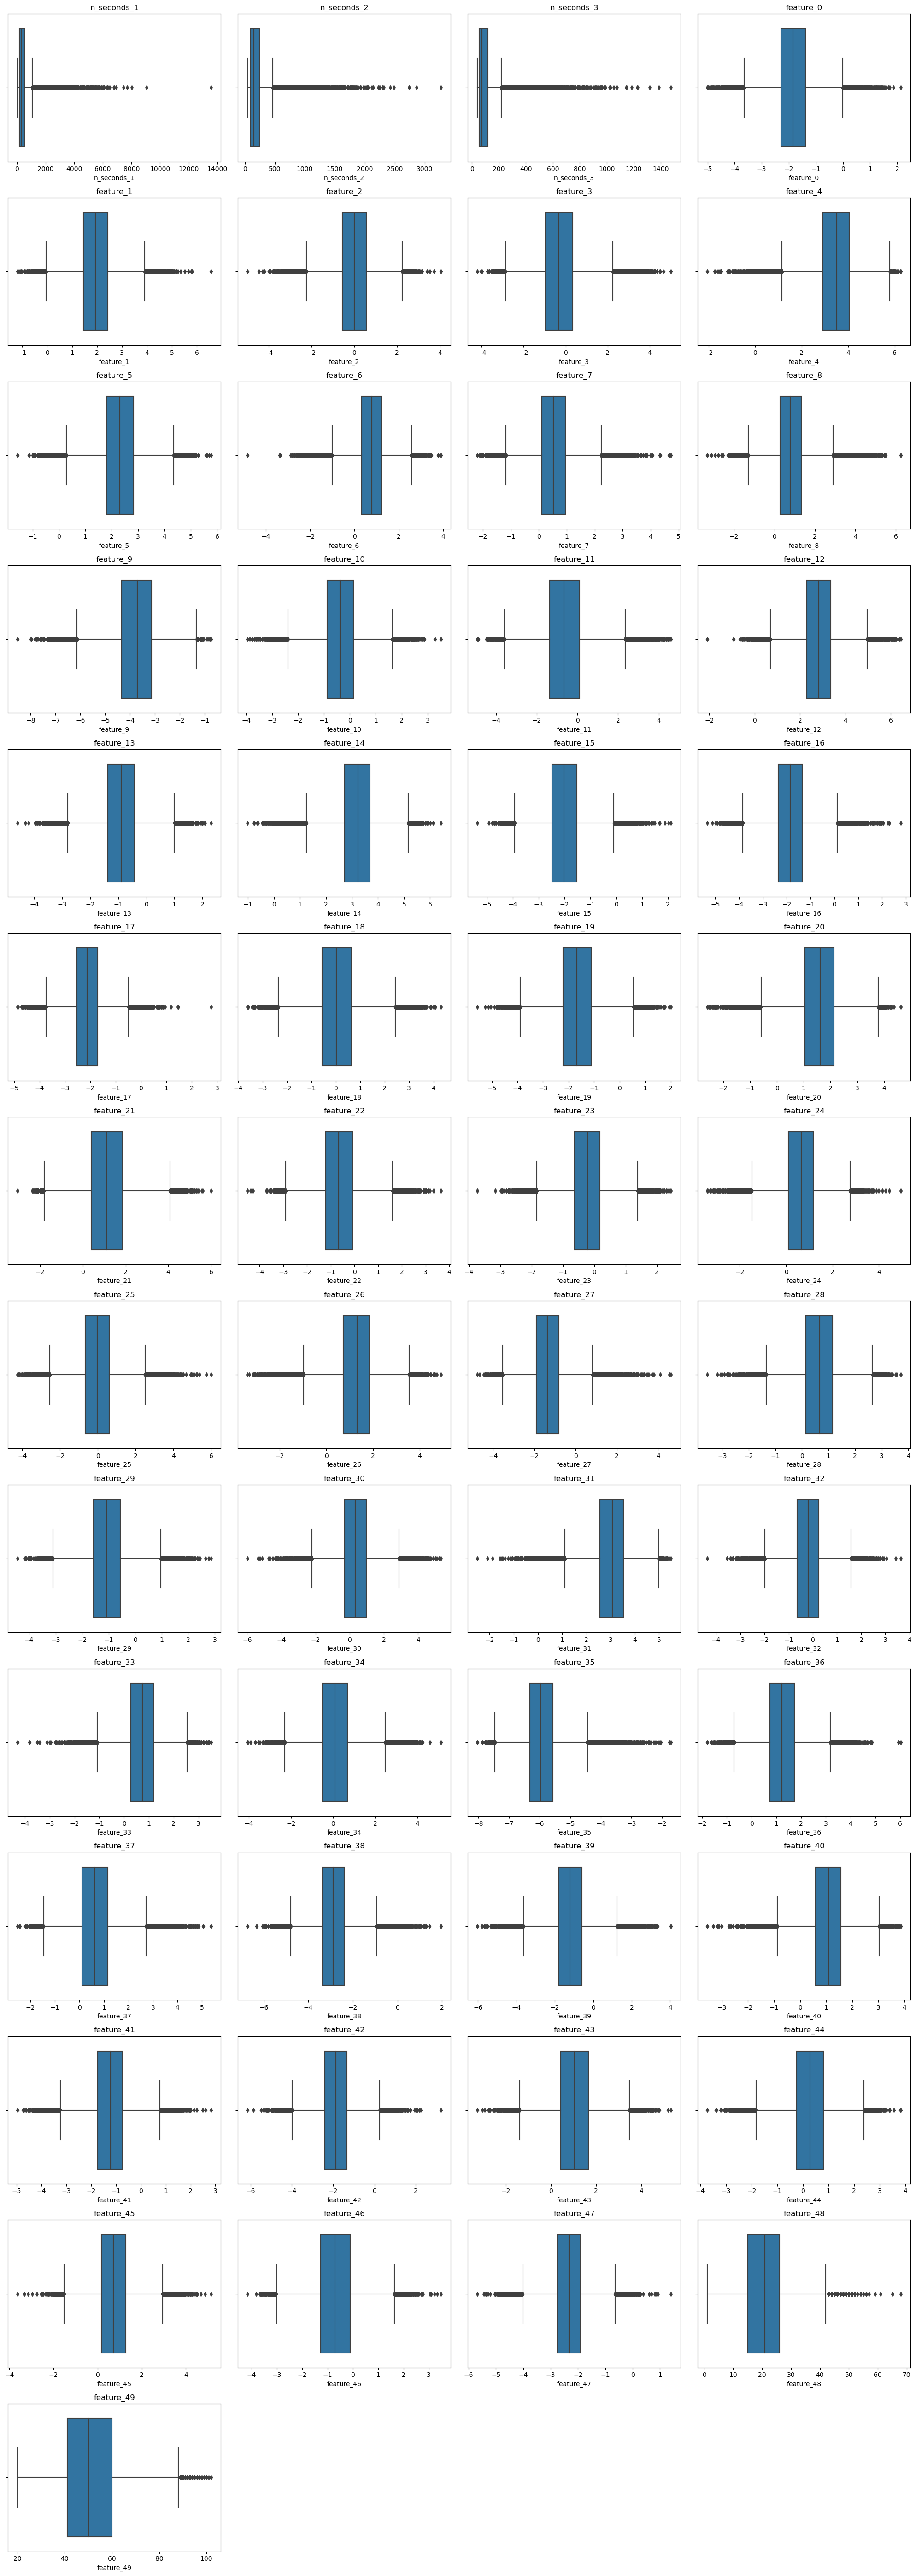

In [19]:
# OUTLIER DETECTION

n_rows = len(num_cols) // 4 + (1 if len(num_cols) % 4 > 0 else 0)
n_cols = 4
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, n_cols * n_rows))

for i, column in enumerate(num_cols):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(x=df[column], ax=axs[row, col])
    axs[row, col].set_title(column)

for i in range(len(num_cols), n_rows * n_cols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()

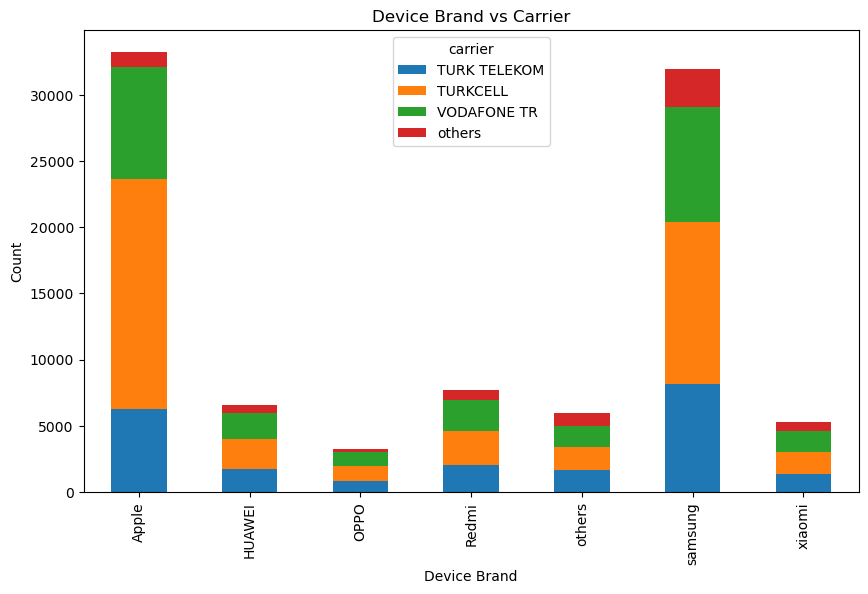

In [20]:
grouped = df.groupby(['devicebrand', 'carrier']).size().reset_index(name='count')

pivot = grouped.pivot(index='devicebrand', columns='carrier', values='count')

ax = pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

ax.set_title('Device Brand vs Carrier')
ax.set_xlabel('Device Brand')
ax.set_ylabel('Count')
plt.show()

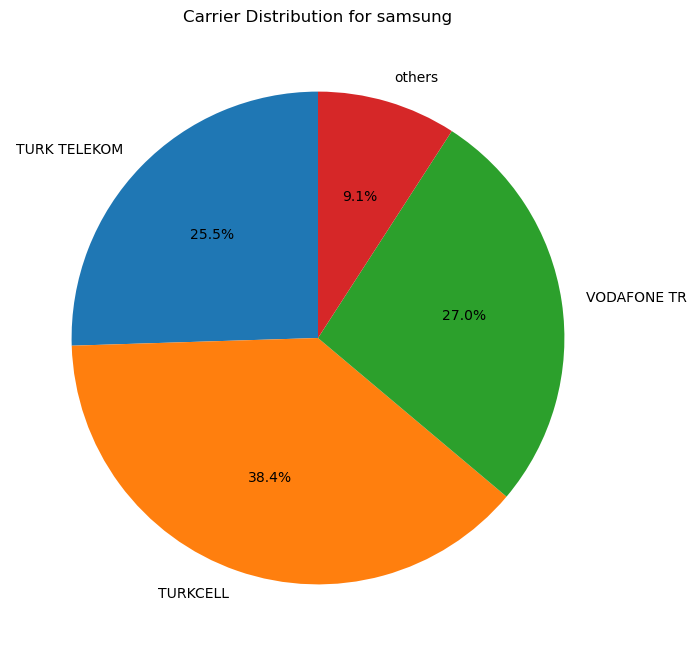

In [21]:
selected_devicebrand = 'samsung'

filtered_df = df[df['devicebrand'] == selected_devicebrand]

grouped = filtered_df.groupby('carrier').size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(grouped['count'], labels=grouped['carrier'], autopct='%1.1f%%', startangle=90)

ax.set_title(f'Carrier Distribution for {selected_devicebrand}')
plt.show()

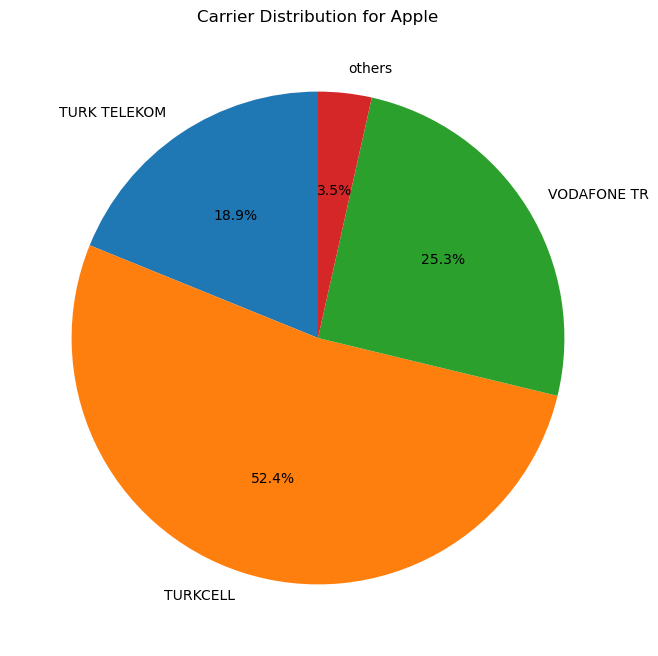

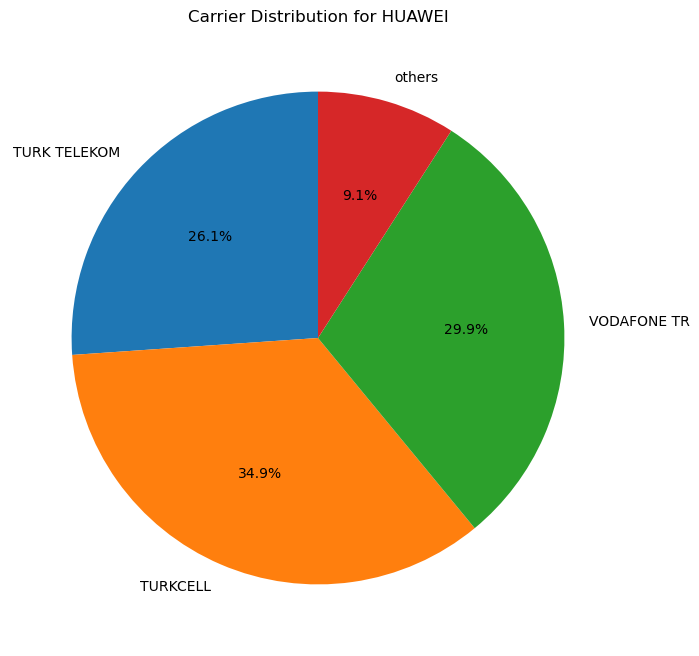

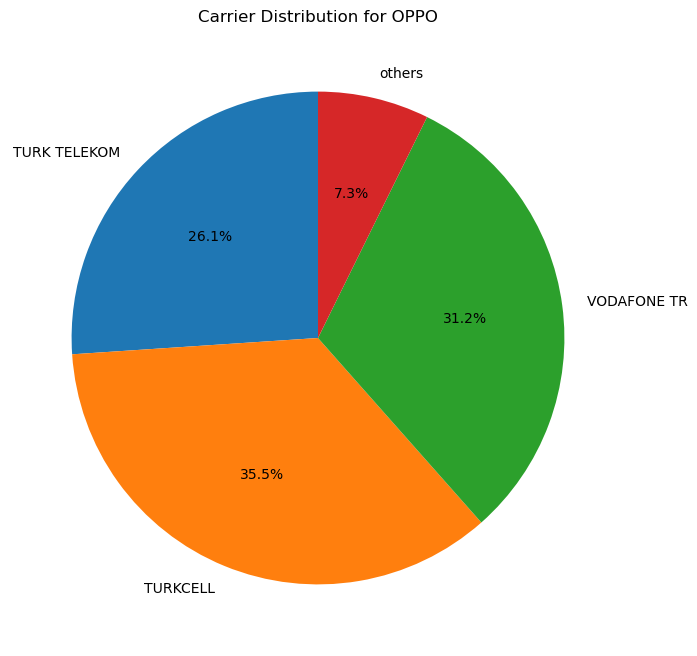

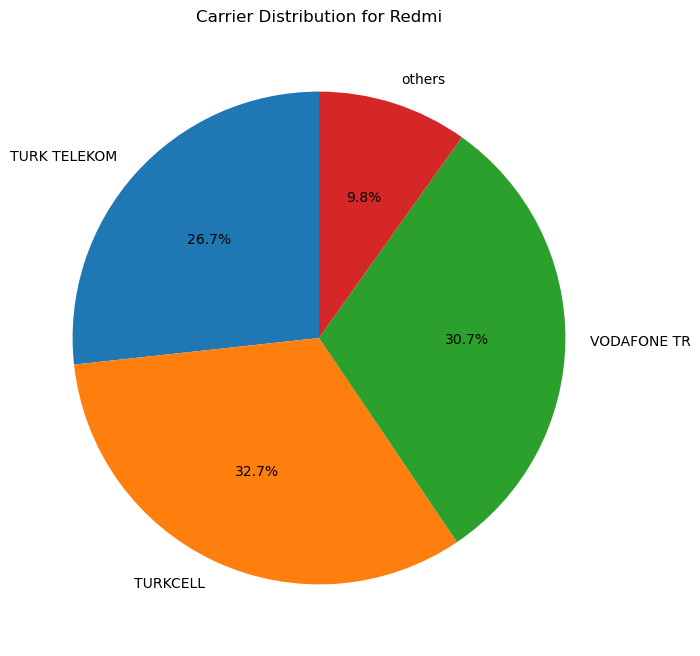

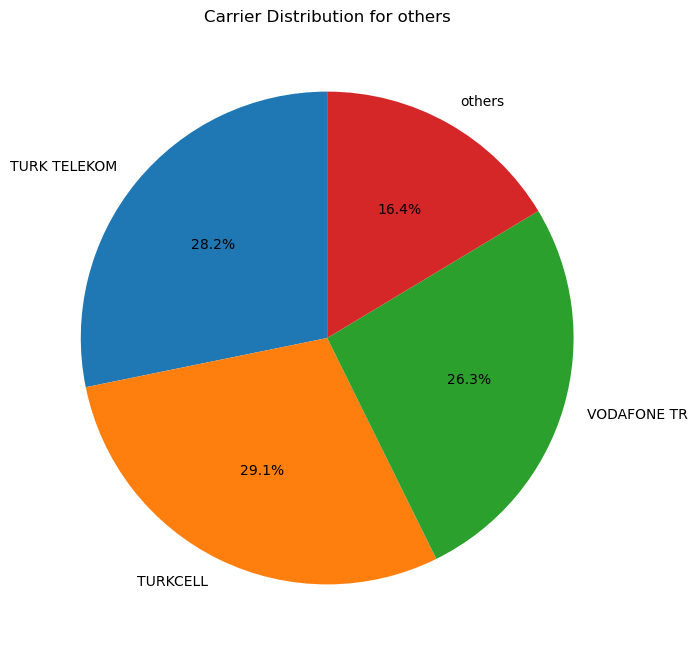

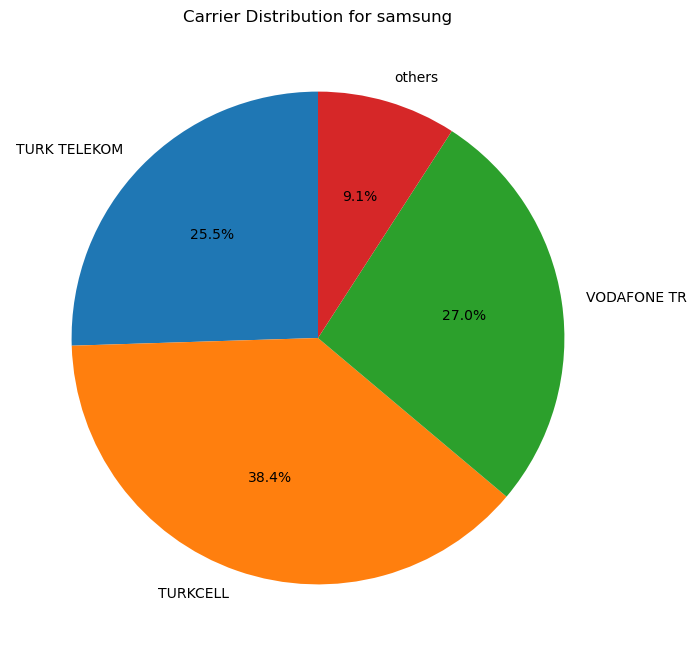

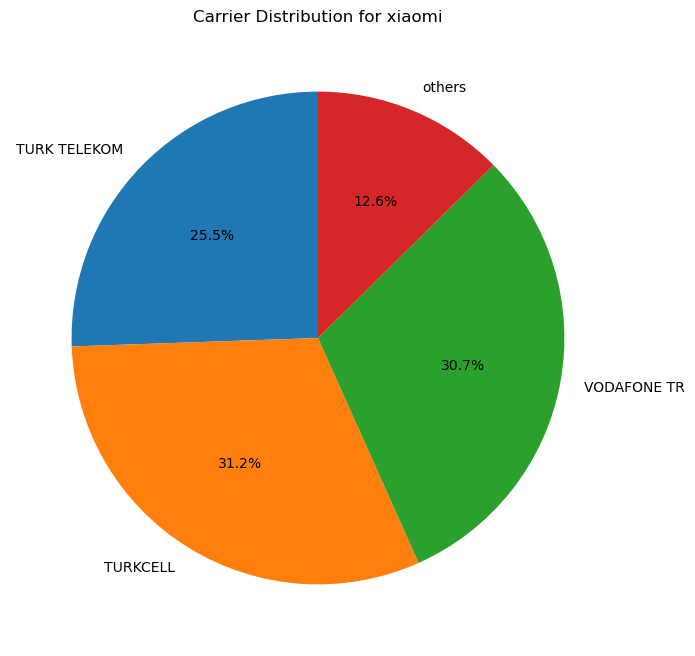

In [22]:
grouped = df.groupby(['devicebrand', 'carrier']).size().reset_index(name='count')

pivot = grouped.pivot(index='devicebrand', columns='carrier', values='count')

for devicebrand in pivot.index:
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(pivot.loc[devicebrand], labels=pivot.columns, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Carrier Distribution for {devicebrand}')
    plt.show()

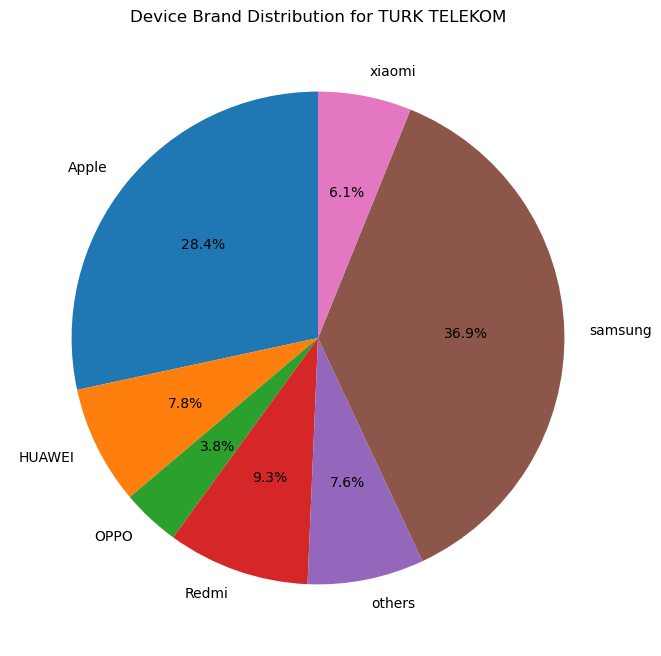

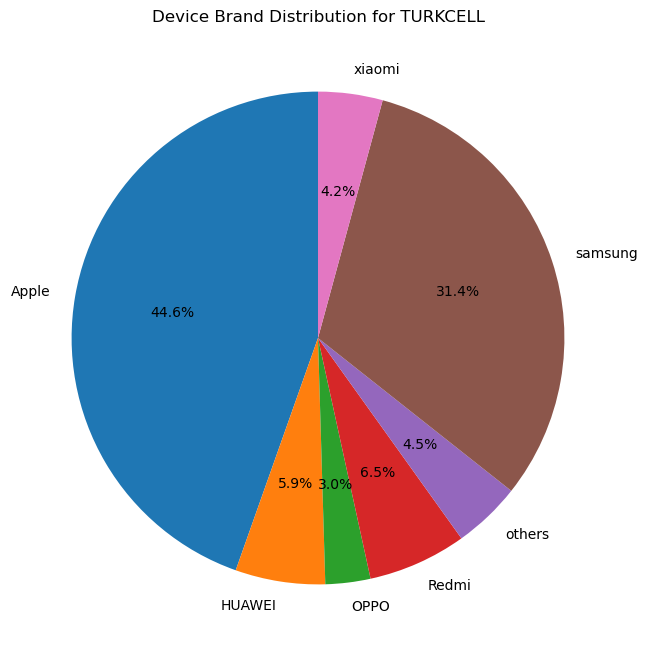

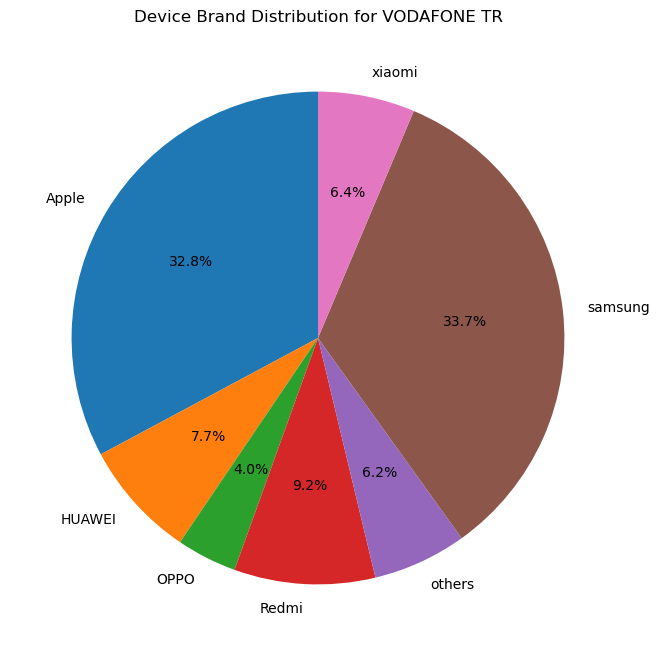

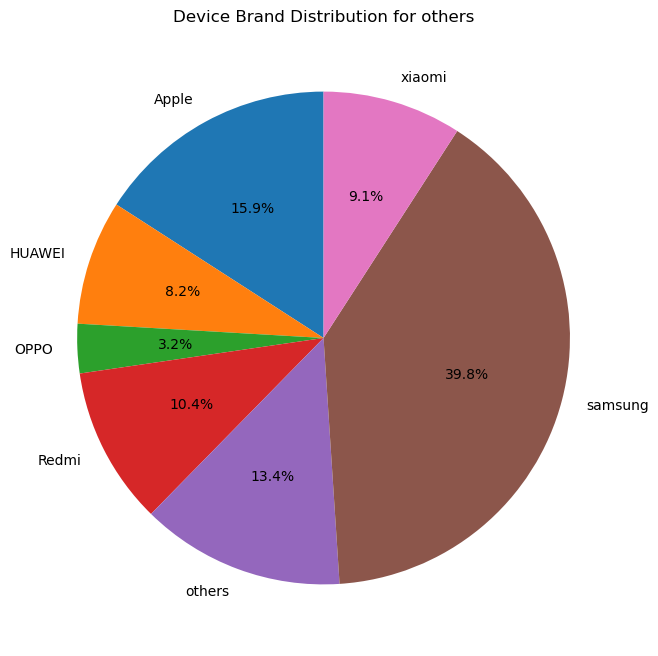

In [23]:
grouped = df.groupby(['carrier', 'devicebrand']).size().reset_index(name='count')

pivot = grouped.pivot(index='carrier', columns='devicebrand', values='count')

for carrier in pivot.index:
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(pivot.loc[carrier], labels=pivot.columns, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Device Brand Distribution for {carrier}')
    plt.show()

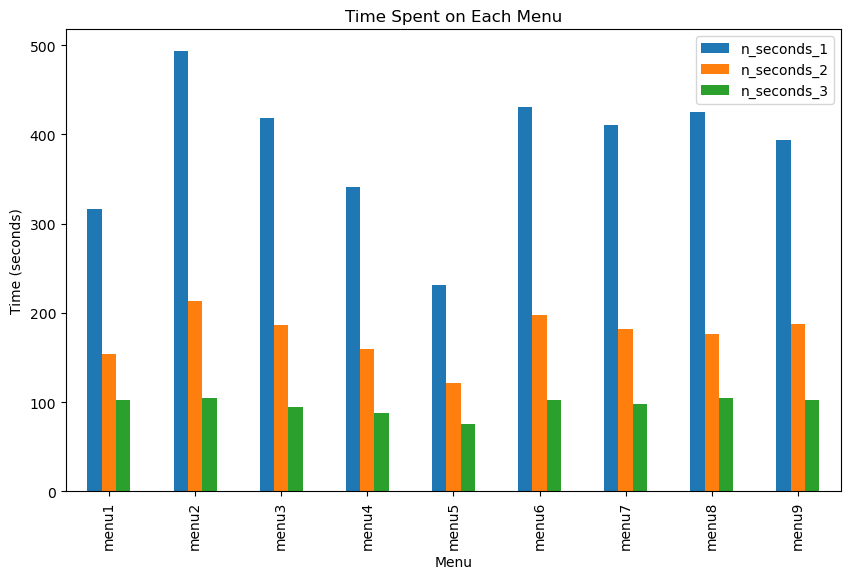

In [24]:
df['menu'] = df['target'].str.extract(r'(menu\d)')

grouped = df.groupby('menu')[['n_seconds_1', 'n_seconds_2', 'n_seconds_3']].mean()

ax = grouped.plot(kind='bar', figsize=(10, 6))

ax.set_title('Time Spent on Each Menu')
ax.set_xlabel('Menu')
ax.set_ylabel('Time (seconds)')

plt.show()

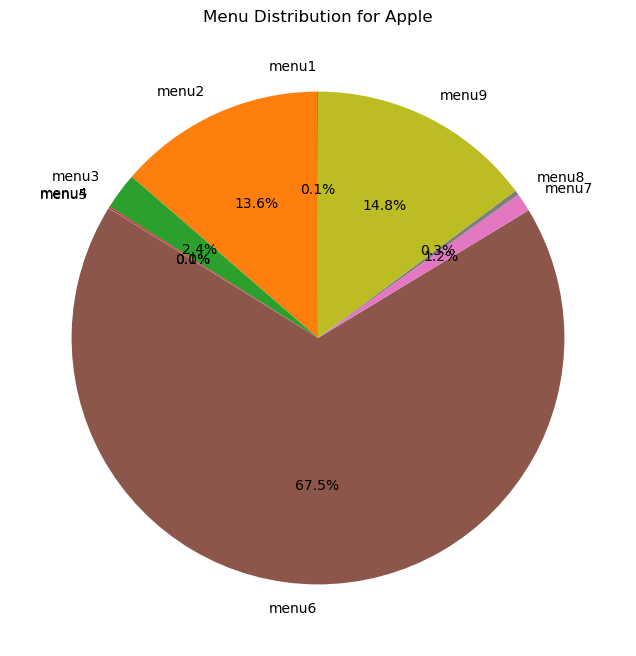

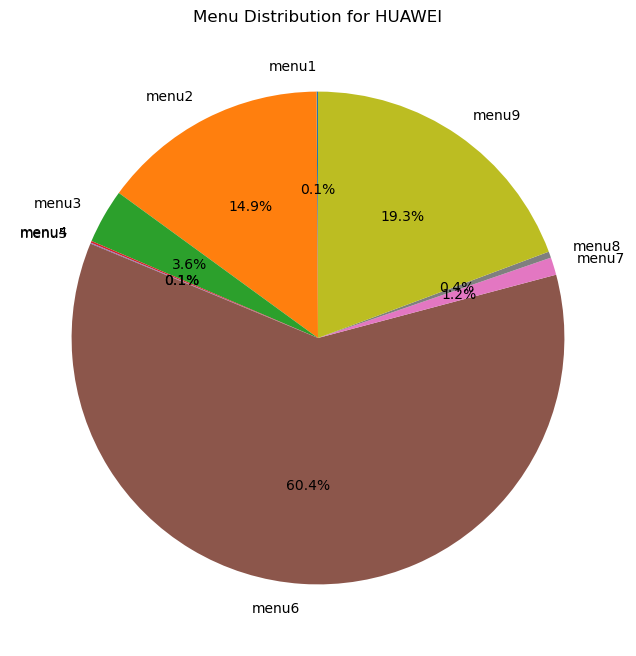

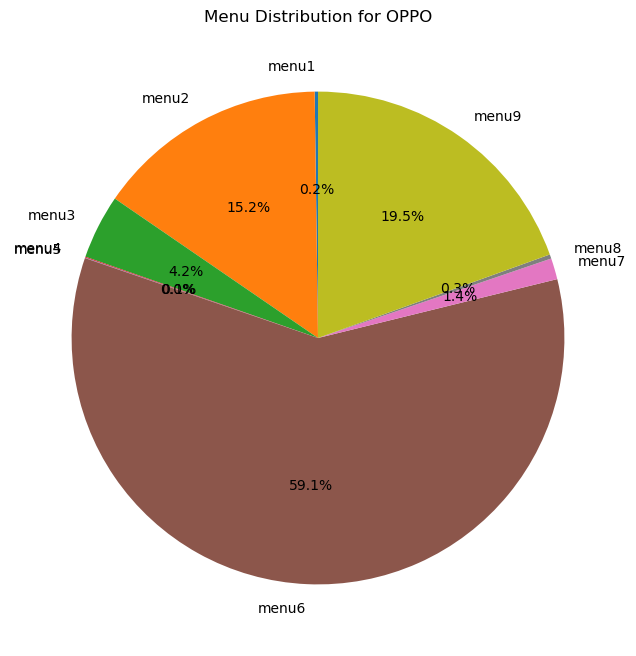

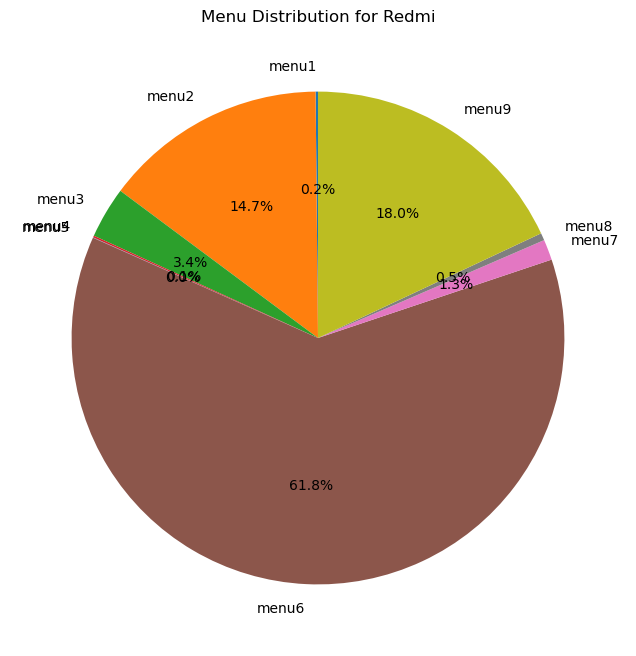

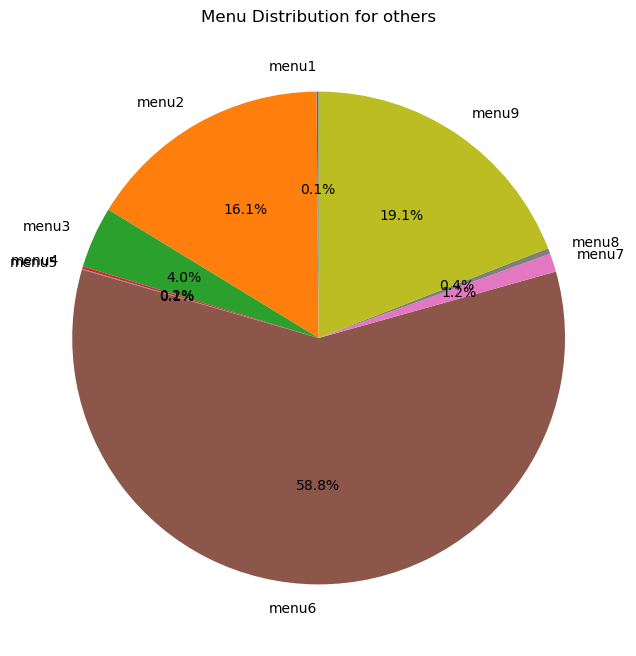

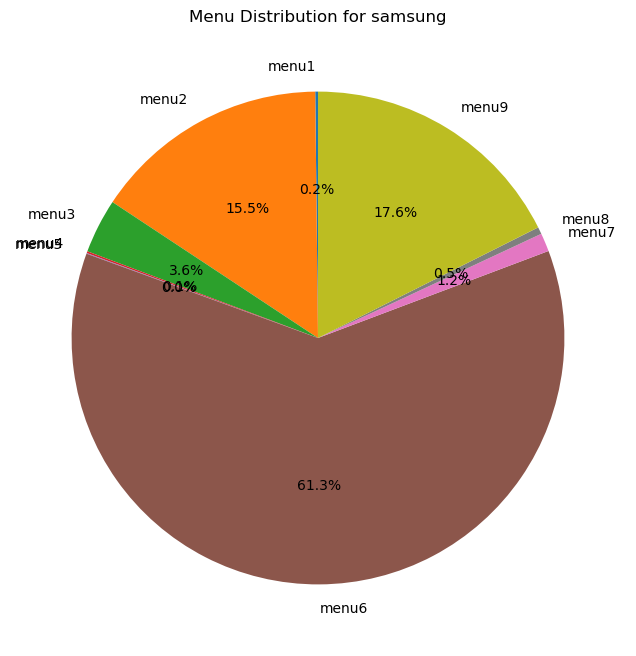

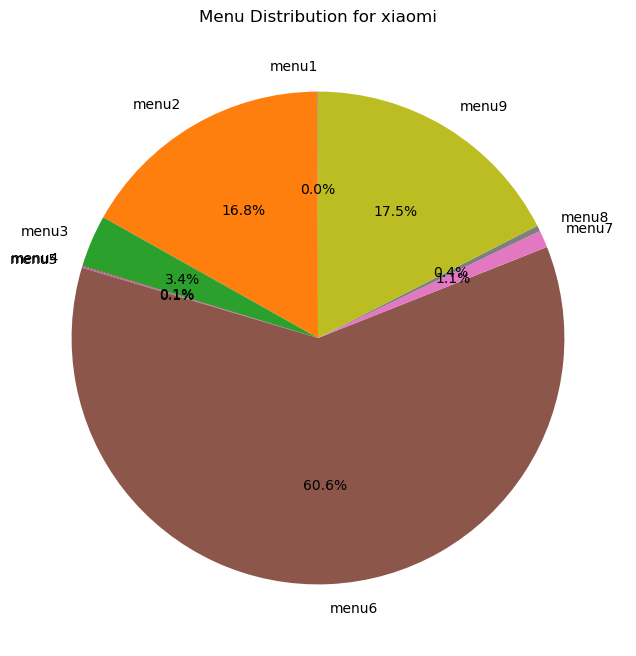

In [25]:
grouped = df.groupby(['devicebrand', 'menu']).size().reset_index(name='count')

for devicebrand in grouped['devicebrand'].unique():
    fig, ax = plt.subplots(figsize=(8, 8))
    data = grouped[grouped['devicebrand'] == devicebrand]
    ax.pie(data['count'], labels=data['menu'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Menu Distribution for {devicebrand}')
    plt.show()

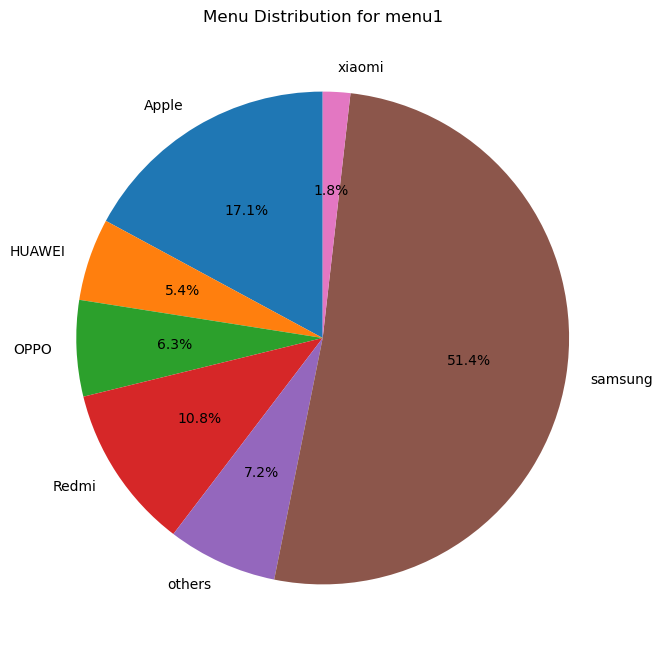

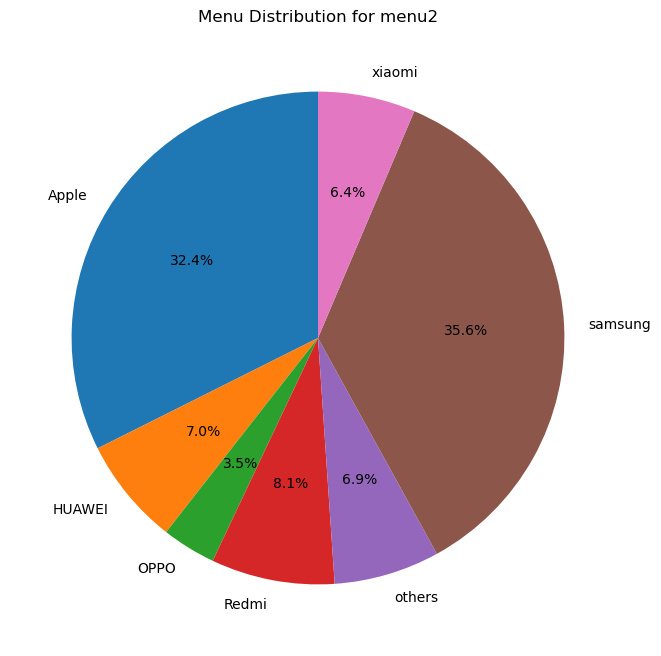

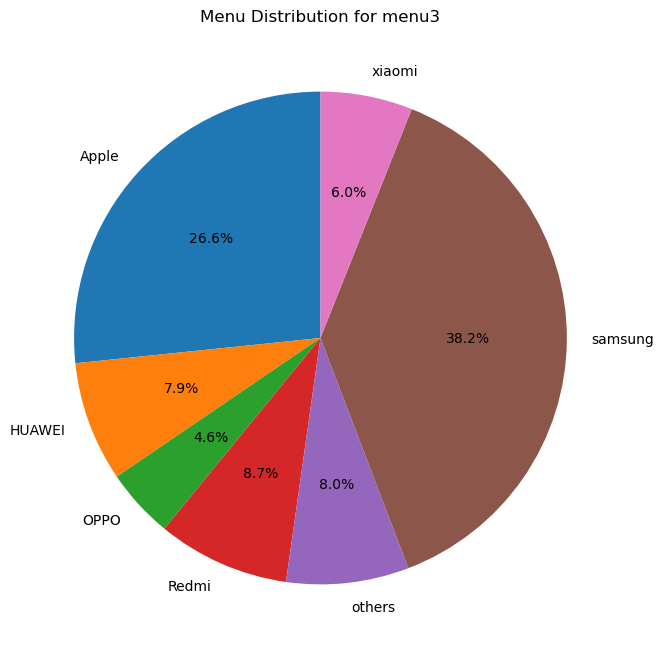

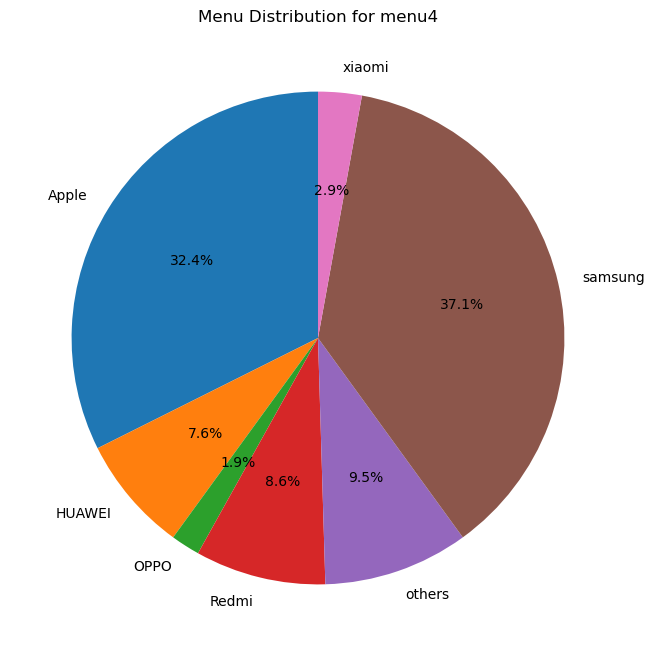

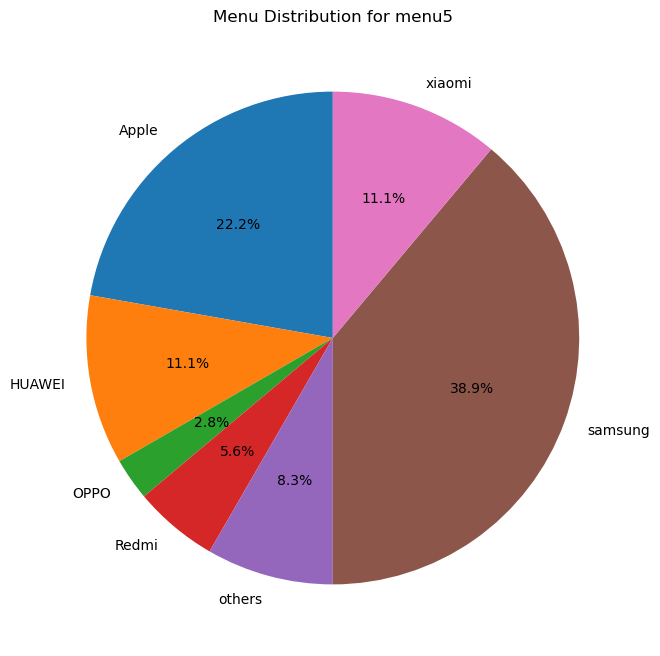

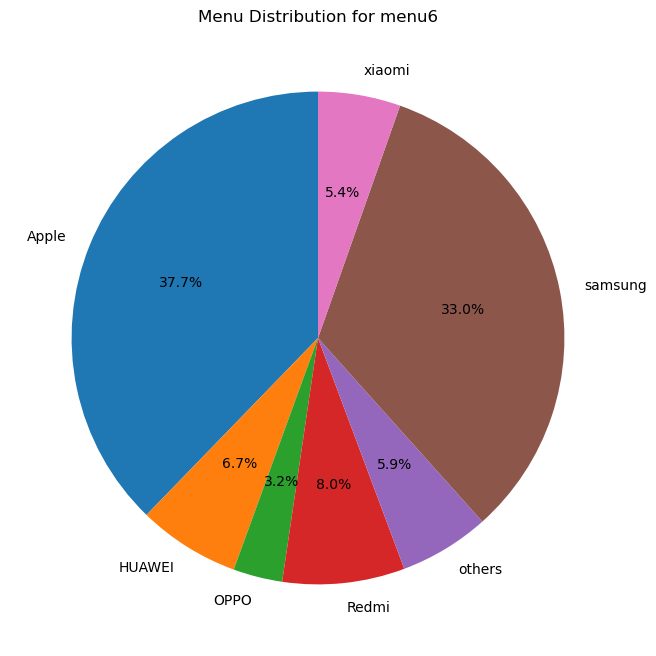

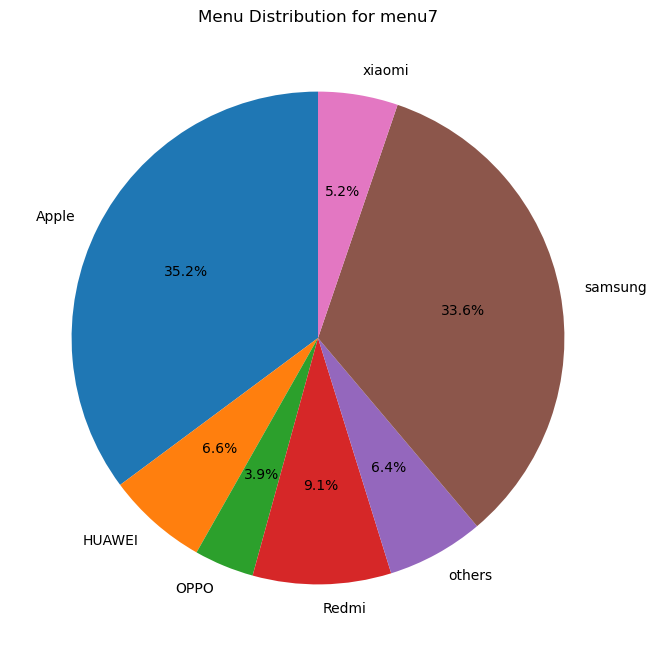

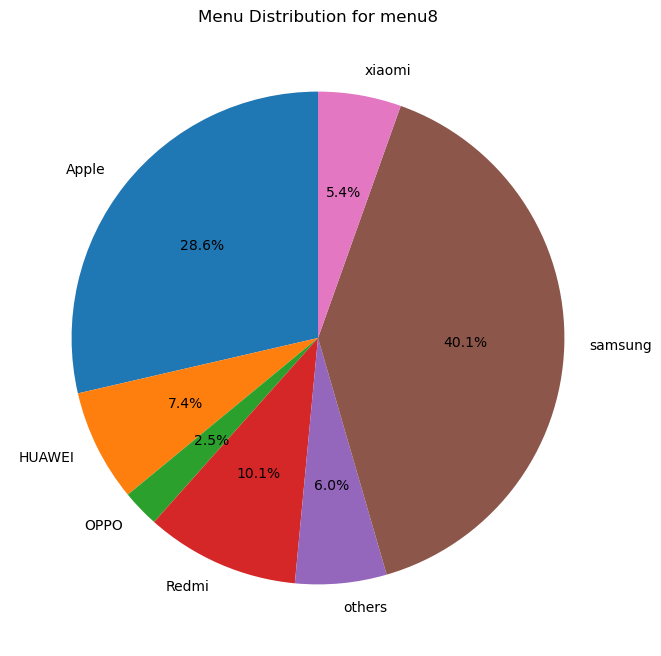

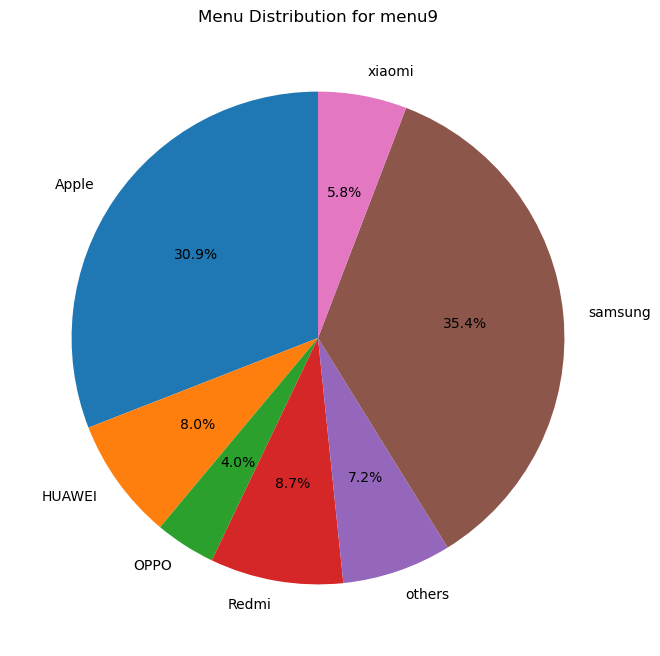

In [26]:
grouped = df.groupby(['menu', 'devicebrand']).size().reset_index(name='count')

for menu in grouped['menu'].unique():
    fig, ax = plt.subplots(figsize=(8, 8))
    data = grouped[grouped['menu'] == menu]
    ax.pie(data['count'], labels=data['devicebrand'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Menu Distribution for {menu}')
    plt.show()

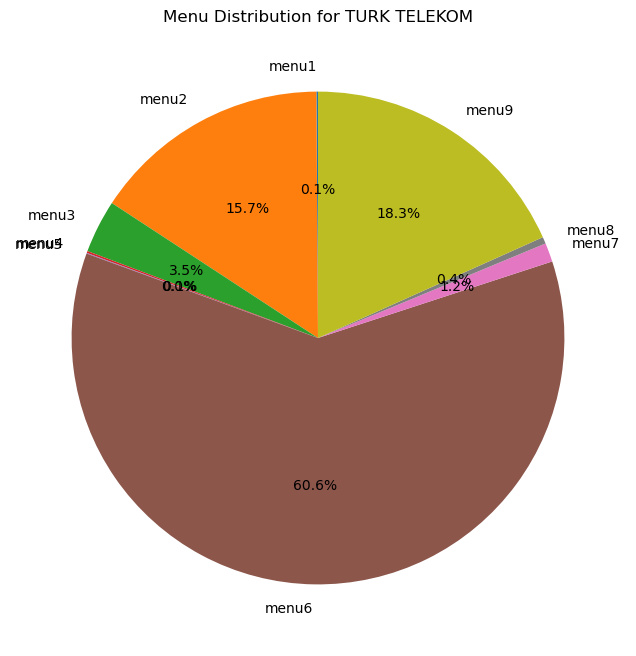

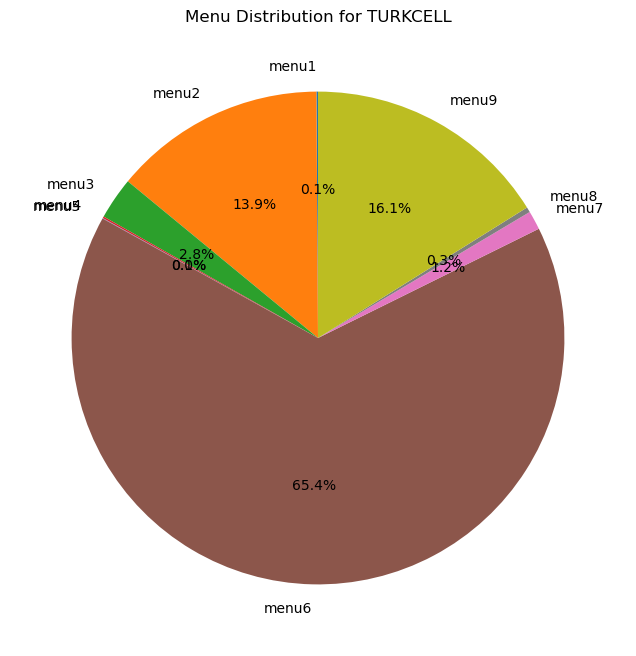

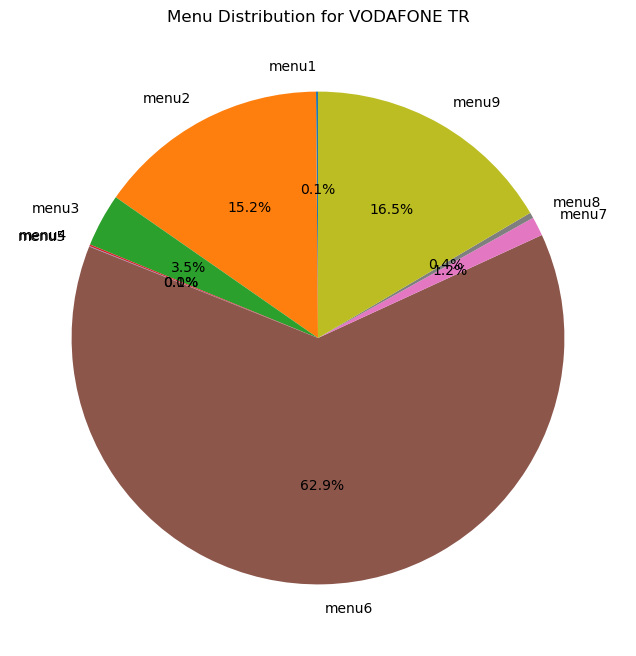

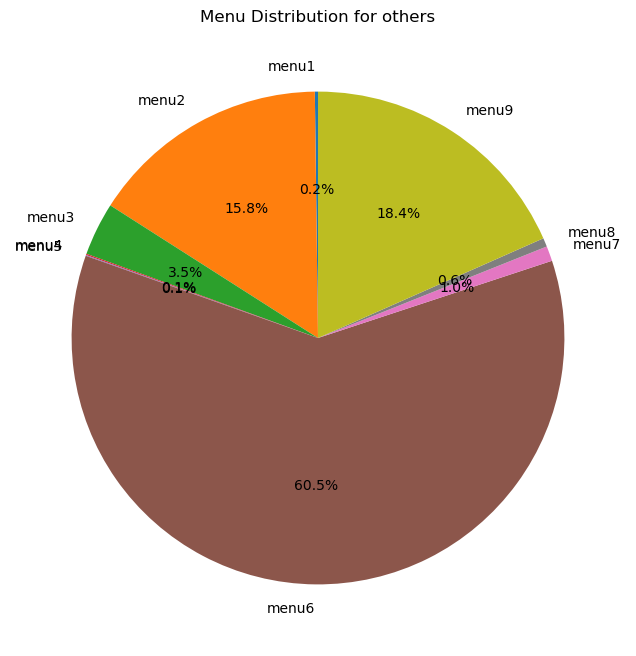

In [27]:
grouped = df.groupby(['carrier', 'menu']).size().reset_index(name='count')

for carrier in grouped['carrier'].unique():
    fig, ax = plt.subplots(figsize=(8, 8))
    data = grouped[grouped['carrier'] == carrier]
    ax.pie(data['count'], labels=data['menu'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Menu Distribution for {carrier}')
    plt.show()

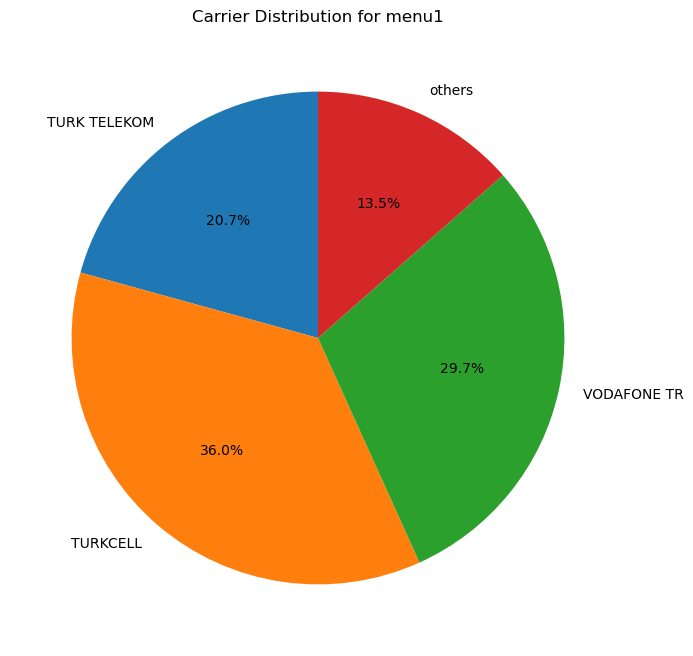

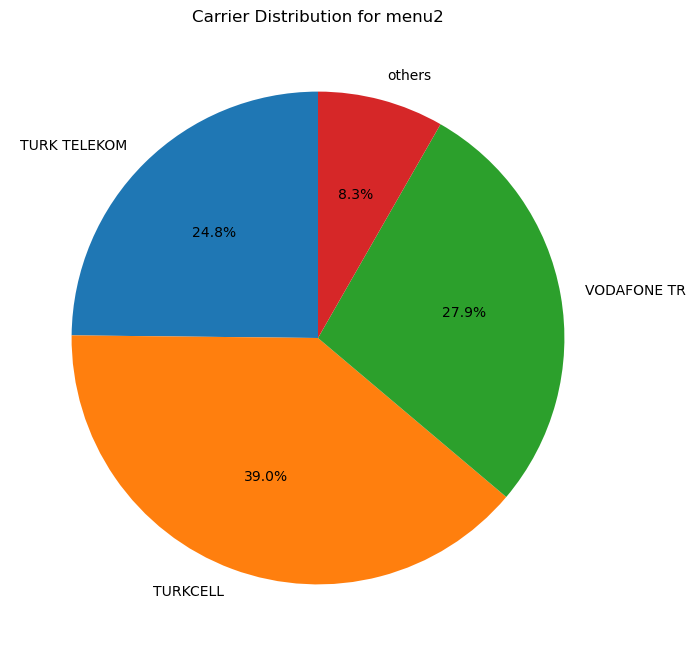

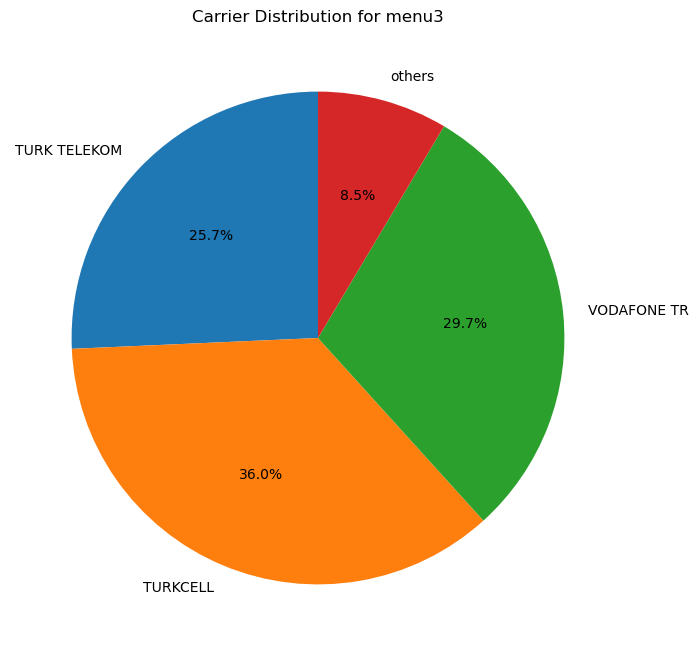

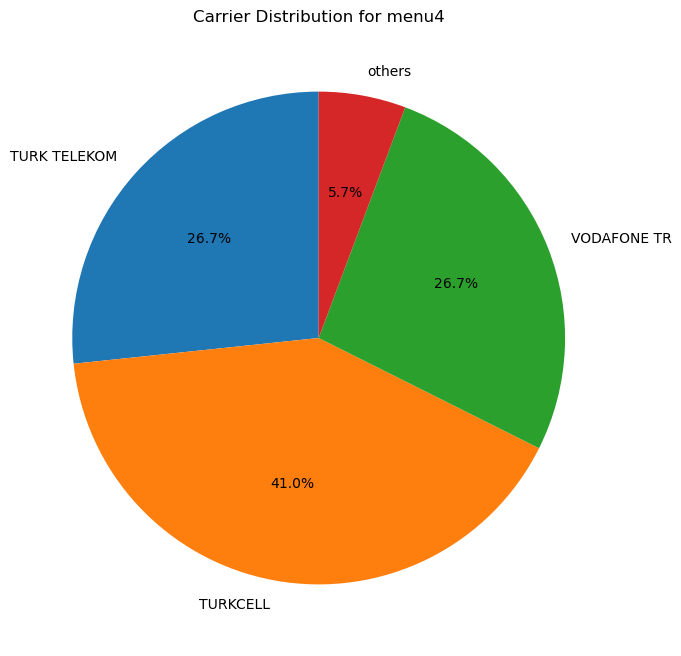

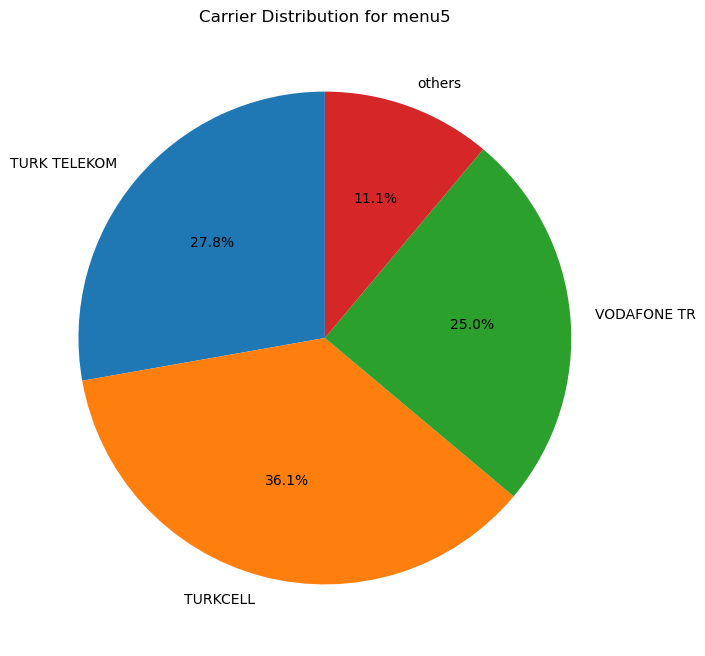

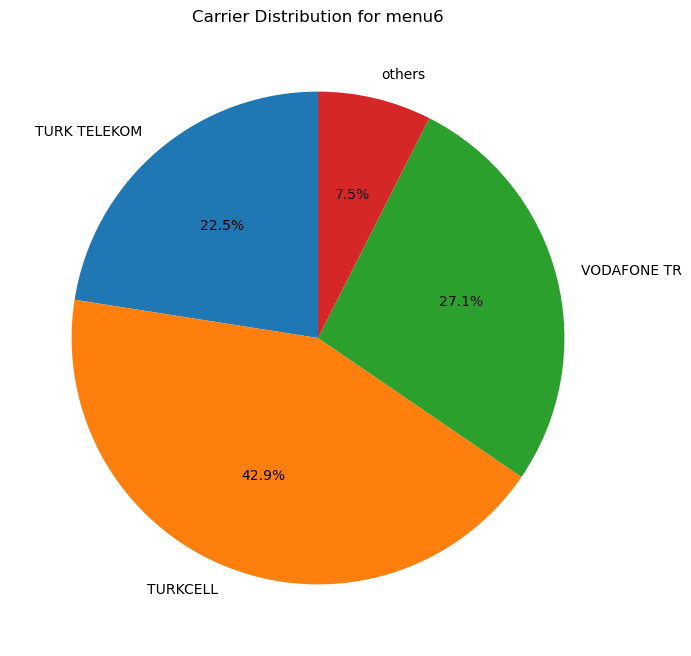

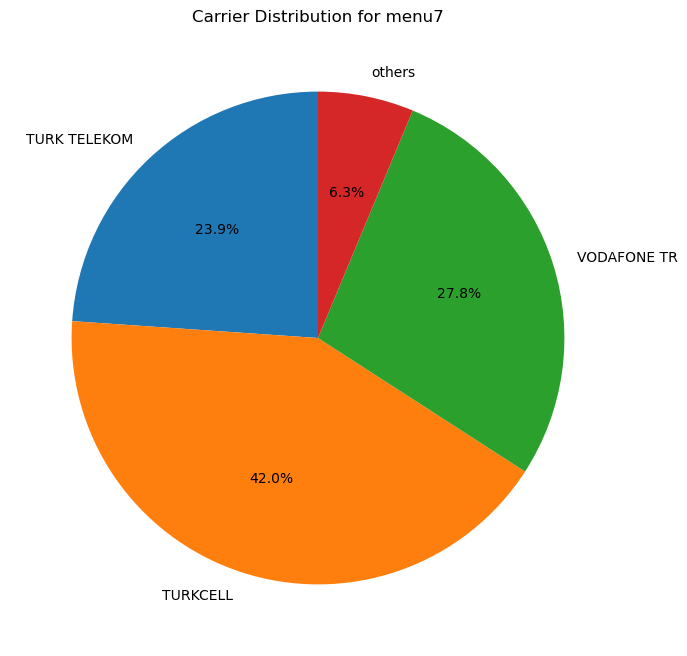

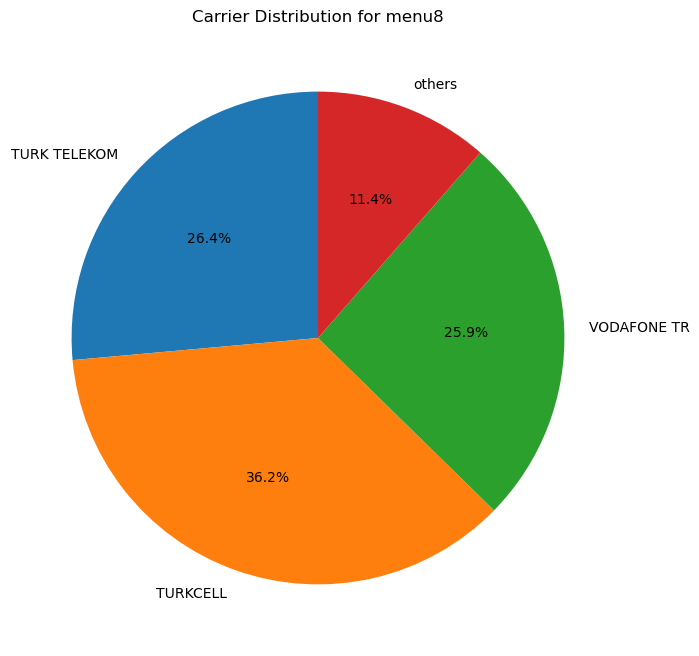

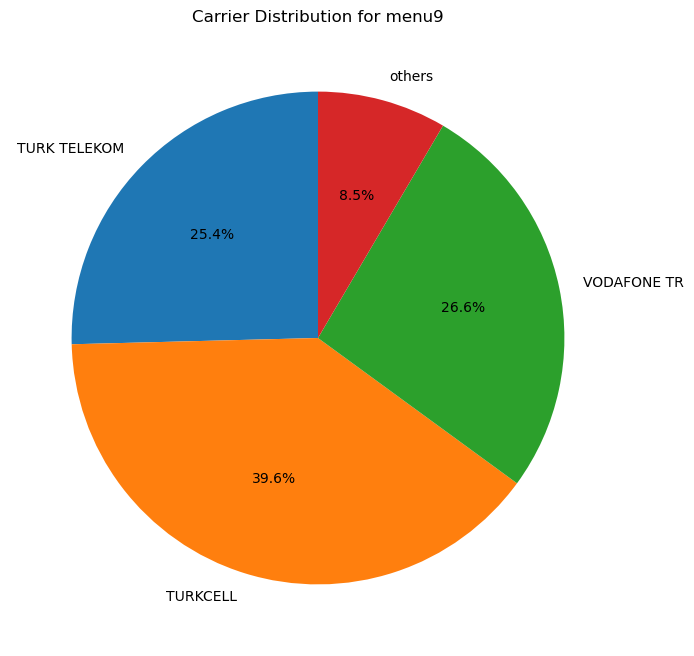

In [28]:
grouped = df.groupby(['menu', 'carrier']).size().reset_index(name='count')

for menu in grouped['menu'].unique():
    fig, ax = plt.subplots(figsize=(8, 8))
    data = grouped[grouped['menu'] == menu]
    ax.pie(data['count'], labels=data['carrier'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Carrier Distribution for {menu}')
    plt.show()

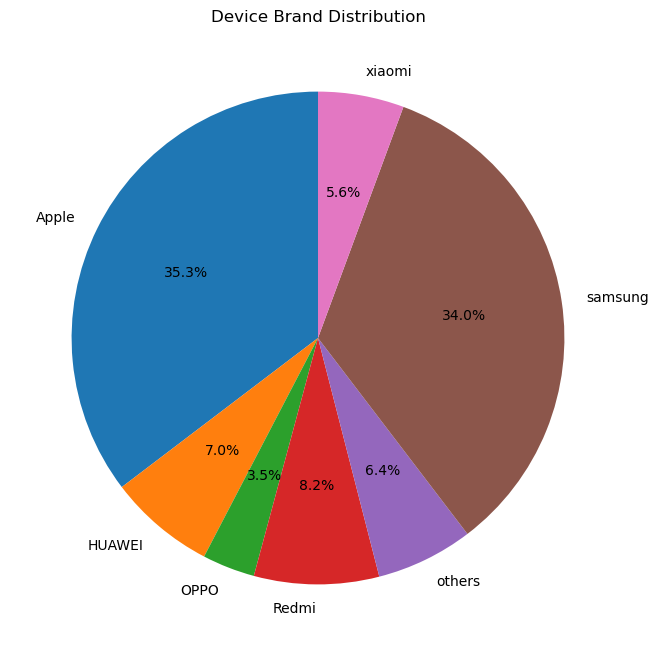

In [29]:
grouped = df.groupby('devicebrand').size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(grouped['count'], labels=grouped['devicebrand'], autopct='%1.1f%%', startangle=90)
ax.set_title('Device Brand Distribution')
plt.show()

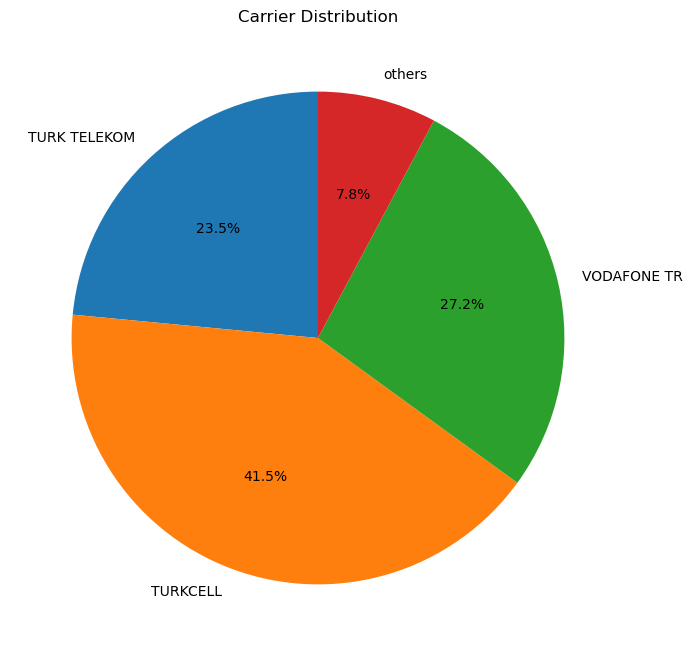

In [30]:
grouped = df.groupby('carrier').size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(grouped['count'], labels=grouped['carrier'], autopct='%1.1f%%', startangle=90)
ax.set_title('Carrier Distribution')
plt.show()

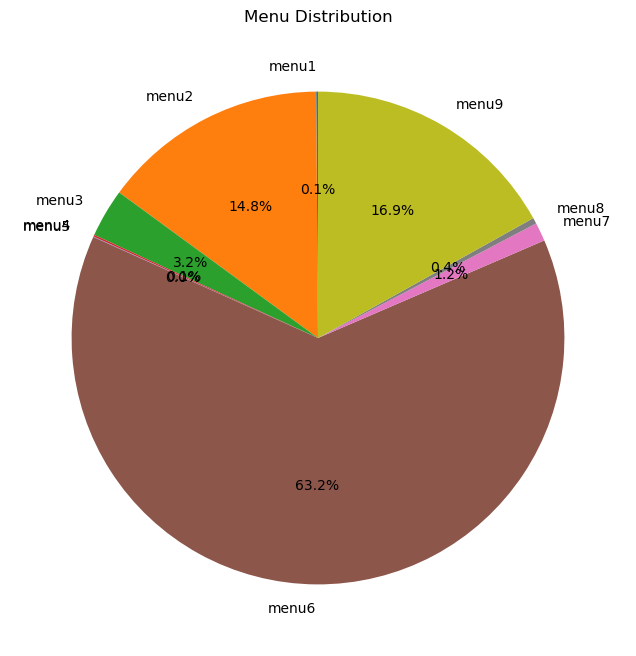

In [31]:
grouped = df.groupby('menu').size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(grouped['count'], labels=grouped['menu'], autopct='%1.1f%%', startangle=90)
ax.set_title('Menu Distribution')
plt.show()

* Device carrier grafigi (yapildi)
* menulere gore gecirilen surenin grafigi (yapildi)
* menulere gore device ve carrier grafigi (yapildi)